# Handling Large Datasets in Python 

## Objective

Handling unstructured large JSON file datasets.

Exploring JSON file on the command line, then import it into Python and work with it using Pandas.

Explore and map out police activity in Montgomery County, Maryland.

## Data Sets

The [dataset](https://catalog.data.gov/dataset/traffic-violations-56dda) contains information on traffic violations in Montgomery County, Maryland. 

The data contains information about where the violation happened, the type of car, demographics on the person receiving the violation, and some other interesting information.

## Exploring the JSON data

In [1]:
%%bash

head md_traffic.json

{
  "meta" : {
    "view" : {
      "id" : "4mse-ku6q",
      "name" : "Traffic Violations",
      "averageRating" : 0,
      "category" : "Public Safety",
      "createdAt" : 1403103517,
      "description" : "This dataset contains traffic violation information from all electronic traffic violations issued in the County.  Any information that can be used to uniquely identify the vehicle, the vehicle owner or the officer issuing the violation will not be published.\r\n\r\nUpdate Frequency:  Daily",
      "displayType" : "table",


From this, it can tell that the JSON data is a dictionary, and is well formatted.  meta is a top level key, and is indented two spaces.

Get all of the top level keys :

In [2]:
%%bash

grep -E '^ {2}"' md_traffic.json

  "meta" : {
  "data" : [ [ 2118167, "EE8BC302-660F-48C4-B422-17427ECE821F", 2118167, 1482239054, "498050", 1482239054, "498050", null, "2013-09-24T00:00:00", "17:11:00", "MCP", "3rd district, Silver Spring", "DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGISTRATION", "8804 FLOWER AVE", null, null, "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "MD", "02 - Automobile", "2008", "FORD", "4S", "BLACK", "Citation", "13-401(h)", "Transportation Article", "No", "BLACK", "M", "TAKOMA PARK", "MD", "MD", "A - Marked Patrol", [ null, null, null, null, null ] ]


A list of lists appears to be associated with data, and this likely contains each record in our traffic violations dataset.

#### Full key structure of the JSON file

In [3]:
%%bash

grep -E '^ {2,6}"' md_traffic.json

  "meta" : {
    "view" : {
      "id" : "4mse-ku6q",
      "name" : "Traffic Violations",
      "averageRating" : 0,
      "category" : "Public Safety",
      "createdAt" : 1403103517,
      "description" : "This dataset contains traffic violation information from all electronic traffic violations issued in the County.  Any information that can be used to uniquely identify the vehicle, the vehicle owner or the officer issuing the violation will not be published.\r\n\r\nUpdate Frequency:  Daily",
      "displayType" : "table",
      "downloadCount" : 76153,
      "hideFromCatalog" : false,
      "hideFromDataJson" : false,
      "iconUrl" : "fileId:r41tDc239M1FL75LFwXFKzFCWqr8mzMeMTYXiA24USM",
      "indexUpdatedAt" : 1503566692,
      "newBackend" : false,
      "numberOfComments" : 0,
      "oid" : 8890705,
      "provenance" : "official",
      "publicationAppendEnabled" : false,
      "publicationDate" : 1411040702,
      "publicationGroup" : 1620779,
      "publicationStage" : "pu

## Extracting information on the columns key

In [4]:
import ijson

filename = "md_traffic.json"
with open(filename, 'r') as f:
    objects = ijson.items(f, 'meta.view.columns.item')
    columns = list(objects)

In [5]:
print(columns[0])

{'id': -1, 'name': 'sid', 'dataTypeName': 'meta_data', 'fieldName': ':sid', 'position': 0, 'renderTypeName': 'meta_data', 'format': {}, 'flags': ['hidden']}


In [6]:
column_names = [col["fieldName"] for col in columns]
column_names

[':sid',
 ':id',
 ':position',
 ':created_at',
 ':created_meta',
 ':updated_at',
 ':updated_meta',
 ':meta',
 'date_of_stop',
 'time_of_stop',
 'agency',
 'subagency',
 'description',
 'location',
 'latitude',
 'longitude',
 'accident',
 'belts',
 'personal_injury',
 'property_damage',
 'fatal',
 'commercial_license',
 'hazmat',
 'commercial_vehicle',
 'alcohol',
 'work_zone',
 'state',
 'vehicle_type',
 'year',
 'make',
 'model',
 'color',
 'violation_type',
 'charge',
 'article',
 'contributed_to_accident',
 'race',
 'gender',
 'driver_city',
 'driver_state',
 'dl_state',
 'arrest_type',
 'geolocation']

## Extracting the data

Use the column names that just extracted to only grab the columns that are relevant.

In [7]:
good_columns = [
    "date_of_stop", 
    "time_of_stop", 
    "agency", 
    "subagency",
    "description",
    "location", 
    "latitude", 
    "longitude", 
    "vehicle_type", 
    "year", 
    "make", 
    "model", 
    "color", 
    "violation_type",
    "race", 
    "gender", 
    "driver_state", 
    "driver_city", 
    "dl_state",
    "arrest_type"
]

data = []
with open(filename, 'r') as f:
    objects = ijson.items(f, 'data.item')
    for row in objects:
        selected_row = []
        for item in good_columns:
            selected_row.append(row[column_names.index(item)])
        data.append(selected_row)

In [8]:
data[0]

['2013-09-24T00:00:00',
 '17:11:00',
 'MCP',
 '3rd district, Silver Spring',
 'DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGISTRATION',
 '8804 FLOWER AVE',
 None,
 None,
 '02 - Automobile',
 '2008',
 'FORD',
 '4S',
 'BLACK',
 'Citation',
 'BLACK',
 'M',
 'MD',
 'TAKOMA PARK',
 'MD',
 'A - Marked Patrol']

## Reading the data into Pandas

In [9]:
import pandas as pd

stops = pd.DataFrame(data, columns=good_columns)

In [10]:
stops["color"].value_counts()

BLACK          227830
SILVER         210041
WHITE          174050
GRAY           123207
RED             90848
BLUE            84512
GREEN           45591
GOLD            37332
TAN             24859
BLUE, DARK      24307
MAROON          20209
BLUE, LIGHT     15596
BEIGE           13691
GREEN, DK       13275
N/A             13160
GREEN, LGT       6768
BROWN            5459
YELLOW           4417
ORANGE           4006
BRONZE           2685
PURPLE           2268
MULTICOLOR        943
CREAM             769
COPPER            373
PINK              177
CHROME             24
CAMOUFLAGE         20
Name: color, dtype: int64

In [11]:
stops["arrest_type"].value_counts()

A - Marked Patrol                         937236
Q - Marked Laser                          114689
B - Unmarked Patrol                        37005
S - License Plate Recognition              13110
O - Foot Patrol                            11857
L - Motorcycle                             10885
E - Marked Stationary Radar                 7178
R - Unmarked Laser                          5280
G - Marked Moving Radar (Stationary)        4568
M - Marked (Off-Duty)                       1685
I - Marked Moving Radar (Moving)            1683
F - Unmarked Stationary Radar                801
H - Unmarked Moving Radar (Stationary)       668
C - Marked VASCAR                            418
J - Unmarked Moving Radar (Moving)           361
P - Mounted Patrol                           288
D - Unmarked VASCAR                          237
N - Unmarked (Off-Duty)                      162
K - Aircraft Assist                           52
Name: arrest_type, dtype: int64

### Findings :
With the rise of red light cameras and speed lasers, it’s interesting that patrol cars are still by far the dominant source of citations.

## Converting columns

Convert the longitude, latitude, and date columns from strings to floats

In [12]:
import numpy as np

def parse_float(x):
    try:
        x = float(x)
    except Exception:
        x = 0
    return x
stops["longitude"] = stops["longitude"].apply(parse_float)
stops["latitude"] = stops["latitude"].apply(parse_float)

time of day and the date of the stop are stored in two separate columns. 

parse both, and turn them into a single datetime column:

In [13]:
import datetime
def parse_full_date(row):
    date = datetime.datetime.strptime(row["date_of_stop"], "%Y-%m-%dT%H:%M:%S")
    time = row["time_of_stop"].split(":")
    date = date.replace(hour=int(time[0]), minute = int(time[1]), second = int(time[2]))
    return date

stops["date"] = stops.apply(parse_full_date, axis=1)

Plotting of which days result in the most traffic stops:

(array([ 155247.,  197752.,  186359.,  176729.,  180077.,  251999.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.]),
 <a list of 6 Patch objects>)

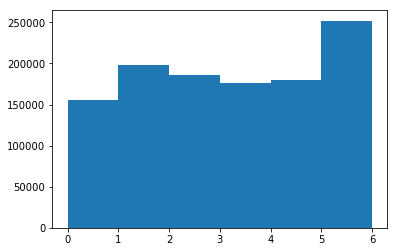

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.hist(stops["date"].dt.weekday, bins=6)

In that plot, Monday is 0, and Sunday is 6. It looks like Sunday has the most stops, and Monday has the least. 

Plotting out the most common traffic stop times:

(array([ 62734.,  51174.,  39279.,  26053.,  15860.,  10618.,  17114.,
         40717.,  61757.,  57407.,  58490.,  48832.,  44938.,  45764.,
         47796.,  40476.,  54829.,  57392.,  45143.,  40197.,  44448.,
         63167.,  88004.,  85974.]),
 array([  0.        ,   0.95833333,   1.91666667,   2.875     ,
          3.83333333,   4.79166667,   5.75      ,   6.70833333,
          7.66666667,   8.625     ,   9.58333333,  10.54166667,
         11.5       ,  12.45833333,  13.41666667,  14.375     ,
         15.33333333,  16.29166667,  17.25      ,  18.20833333,
         19.16666667,  20.125     ,  21.08333333,  22.04166667,  23.        ]),
 <a list of 24 Patch objects>)

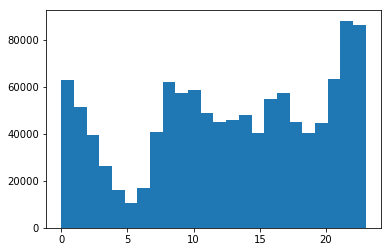

In [15]:
plt.hist(stops["date"].dt.hour, bins=24)

It looks like the most stops happen around midnight, and the fewest happen around 5am. This might make sense, as people are driving home from bars and dinners late and night, and may be impaired.

## Subsetting the stops

Map out the traffic stops.

Filtering all of the rows that came in the past year. and only select rows that occurred during rush hour – the morning period when everyone is going to work:

In [16]:
last_year = stops[stops["date"] > datetime.datetime(year=2015, month=2, day=18)]

In [17]:
morning_rush = last_year[(last_year["date"].dt.weekday < 5) & (last_year["date"].dt.hour > 5) & (last_year["date"].dt.hour < 10)]
print(morning_rush.shape)
last_year.shape

(70533, 21)


(553662, 21)

## Using folium package

Visualize where all the stops occurred. visualize the first 1000 rows of morning_rush:

In [19]:
import folium
from folium import plugins

stops_map = folium.Map(location=[39.0836, -77.1483], zoom_start=11)
marker_cluster = folium.MarkerCluster().add_to(stops_map)
for name, row in morning_rush.iloc[:1000].iterrows():
    folium.Marker([row["longitude"], row["latitude"]], popup=row["description"]).add_to(marker_cluster)
stops_map.save('stops.html')
stops_map

Extend the analysis further with a heatmap:

In [20]:
stops_heatmap = folium.Map(location=[39.0836, -77.1483], zoom_start=11)
stops_heatmap.add_children(plugins.HeatMap([[row["longitude"], row["latitude"]] for name, row in morning_rush.iloc[:1000].iterrows()]))
stops_heatmap.save("heatmap.html")
stops_heatmap

F:\ANACONDA\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  from ipykernel import kernelapp as app
